Statistical tests for childhood exposure to innovation by patent category:

               inventor I inventor II inventor III inventor IIII inventor IIIII inventor IIIIII inventor IIIIIII
----------------------------------------------------------------------------------------------------------------
const          0.0012***  0.0008***   0.0009***    0.0010***     0.0013***      0.0009***       0.0013***       
               (0.0001)   (0.0000)    (0.0000)     (0.0000)      (0.0000)       (0.0001)        (0.0001)        
inventor_cat_1 5.4073***                                                                                        
               (0.2411)                                                                                         
inventor_cat_2            2.1777***                                                                             
                          (0.0555)                                                                              
inventor_cat_3      

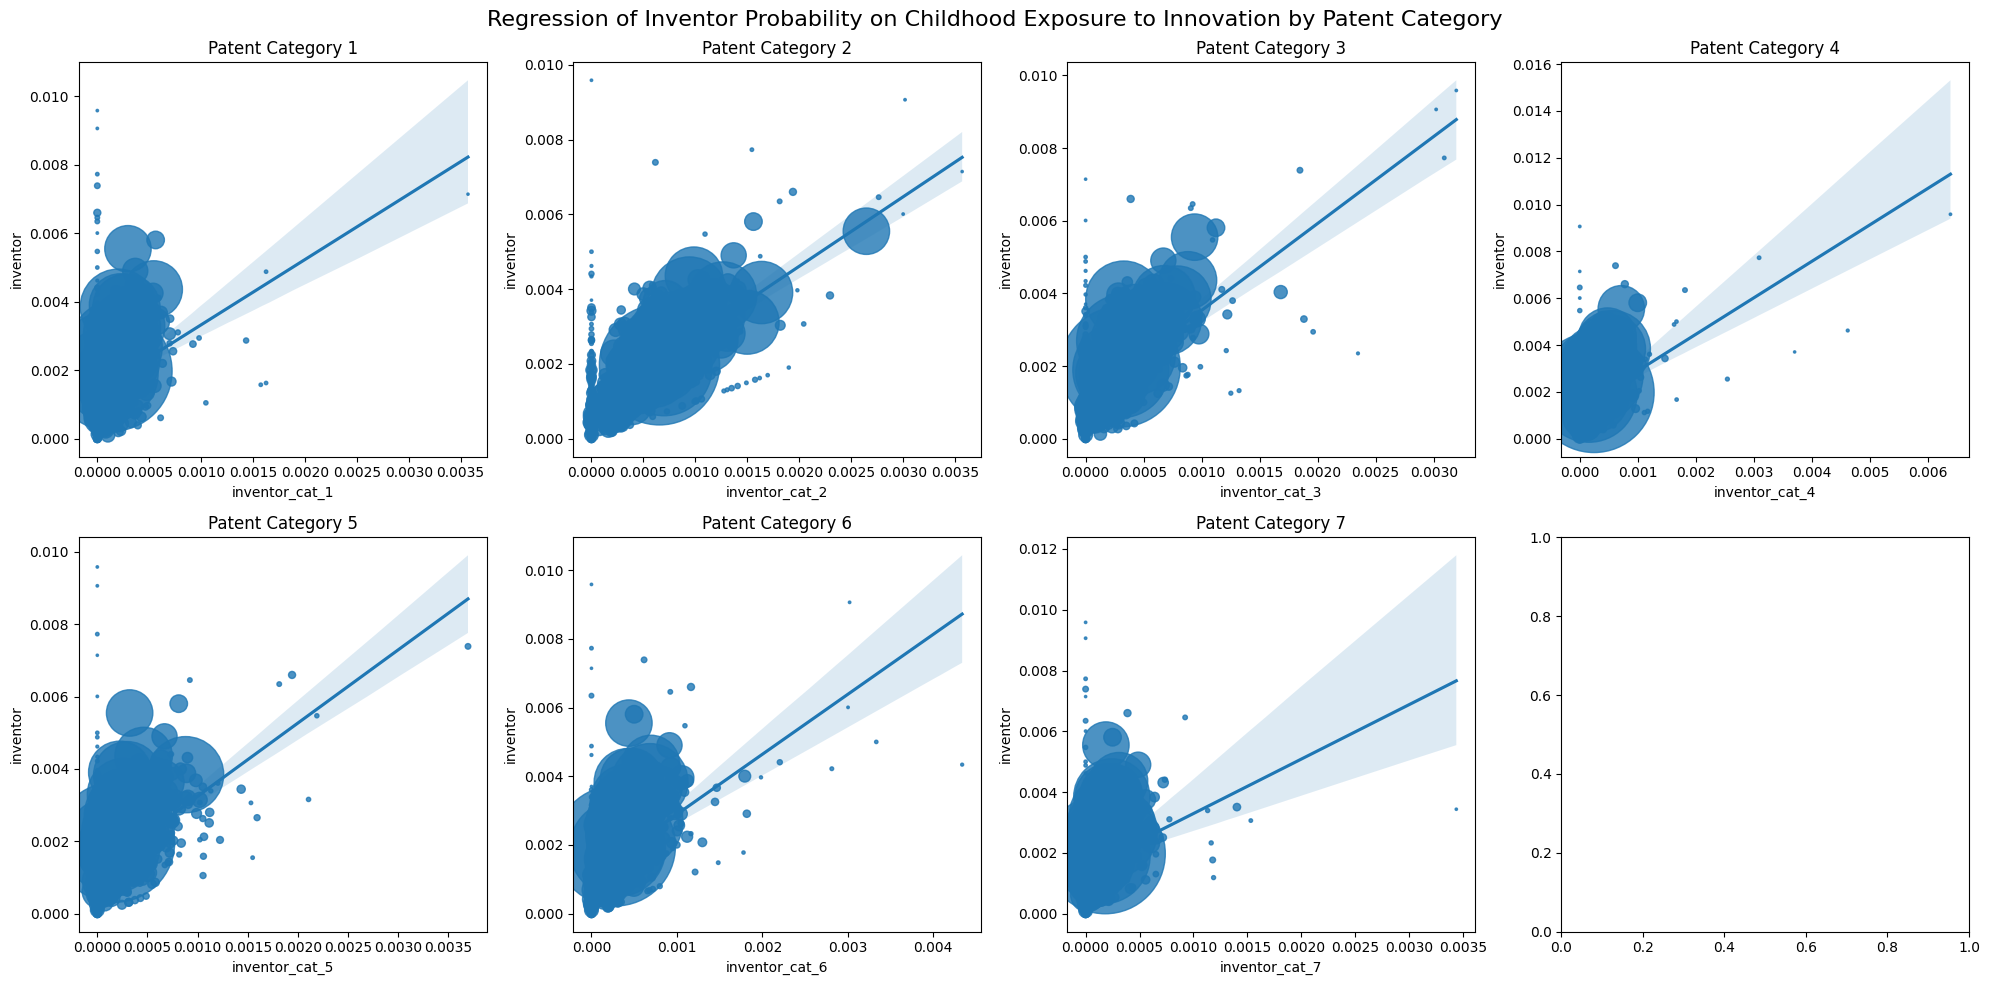

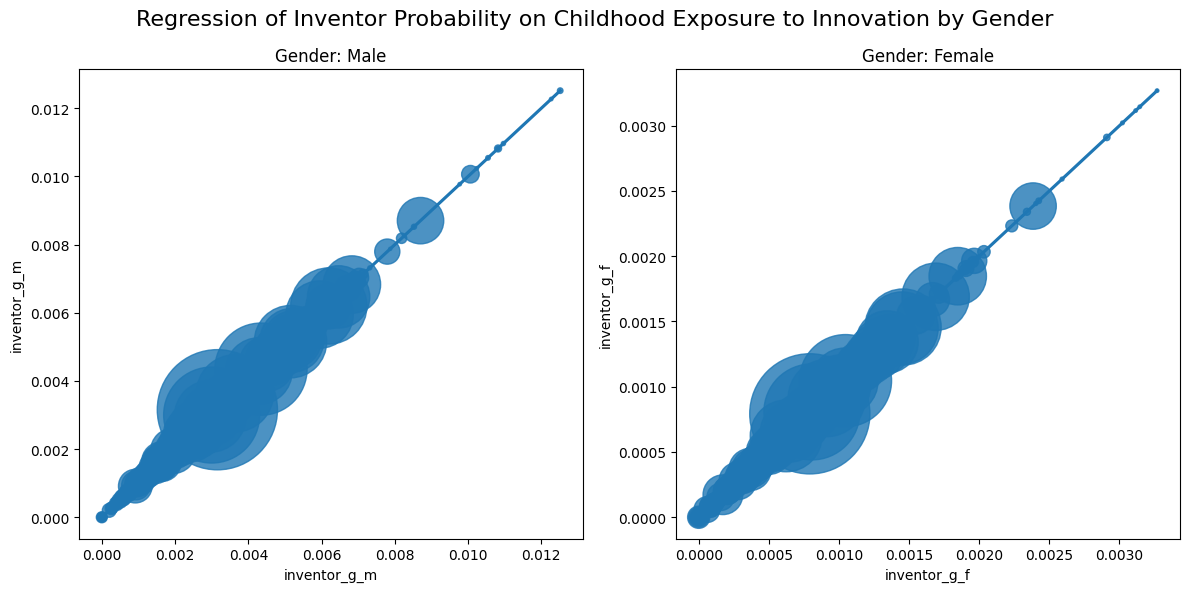

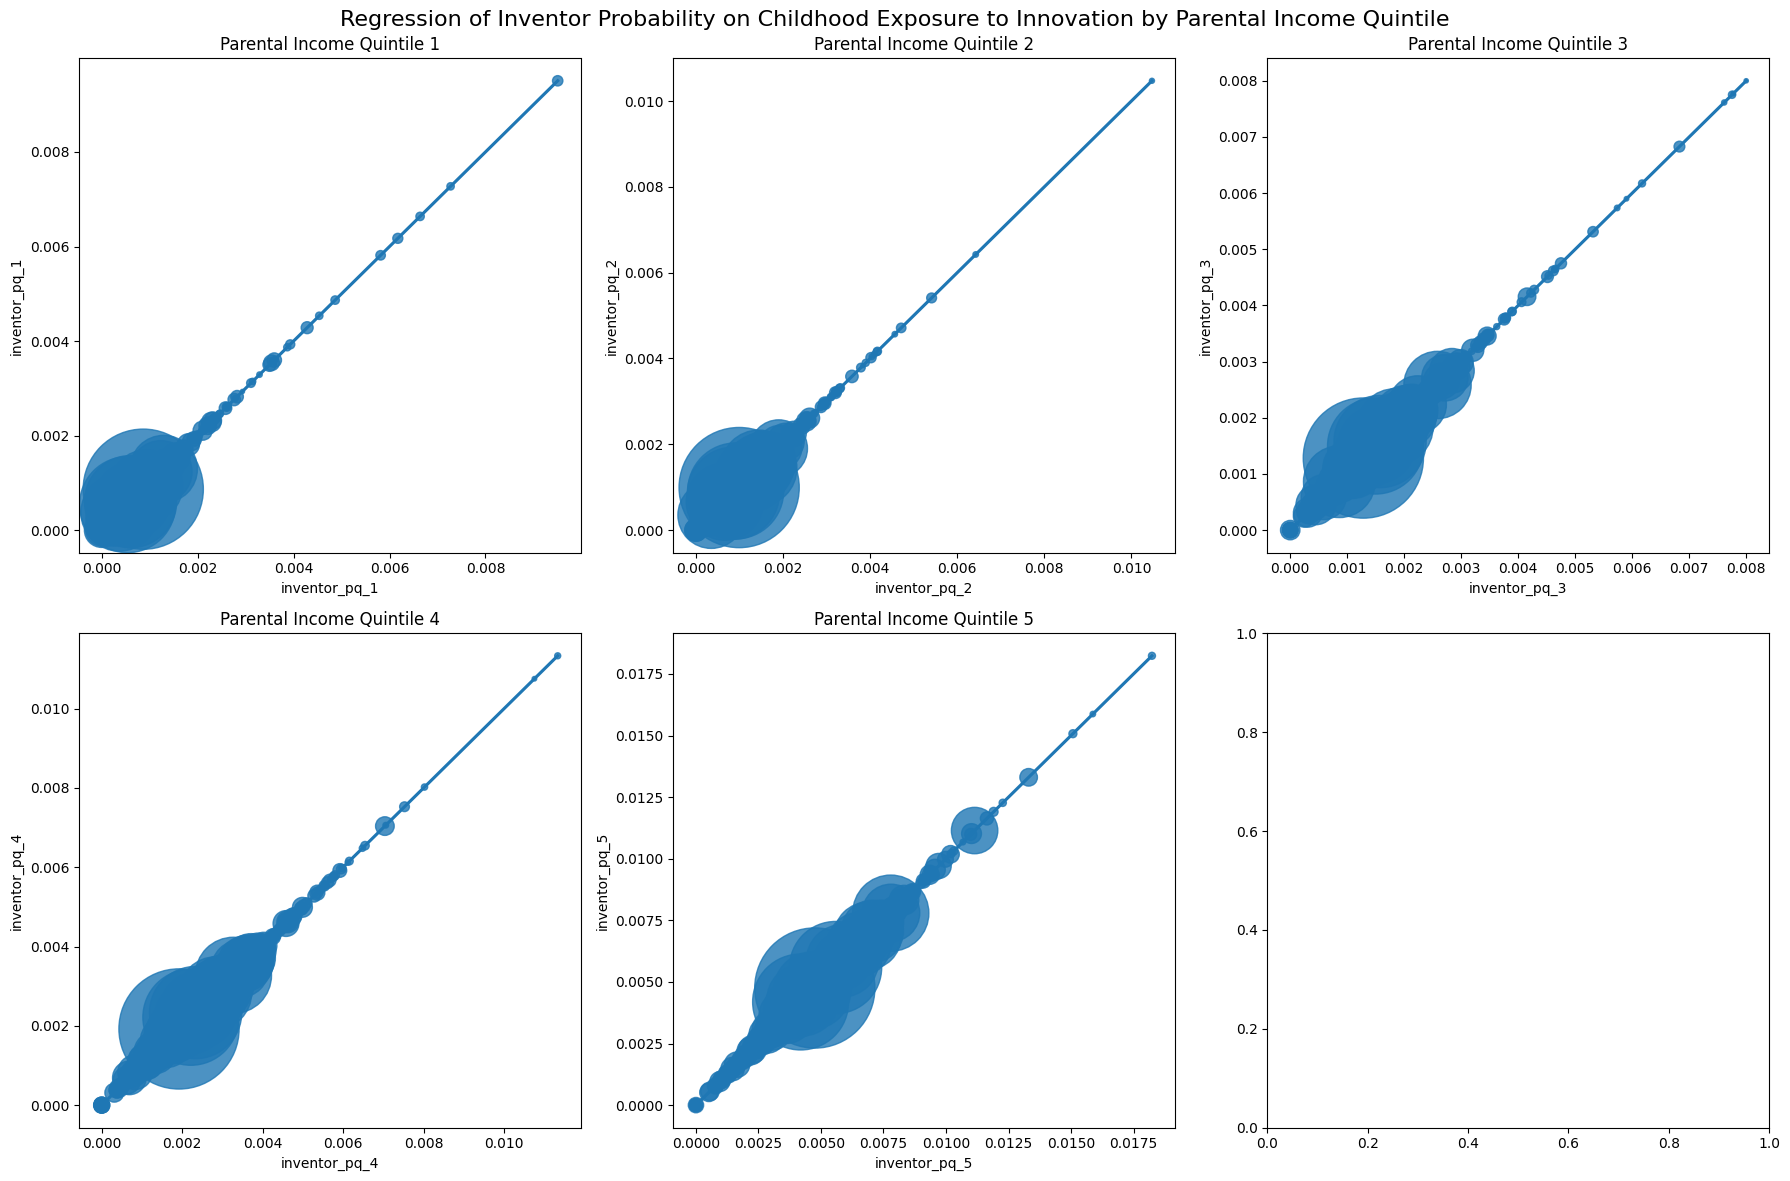

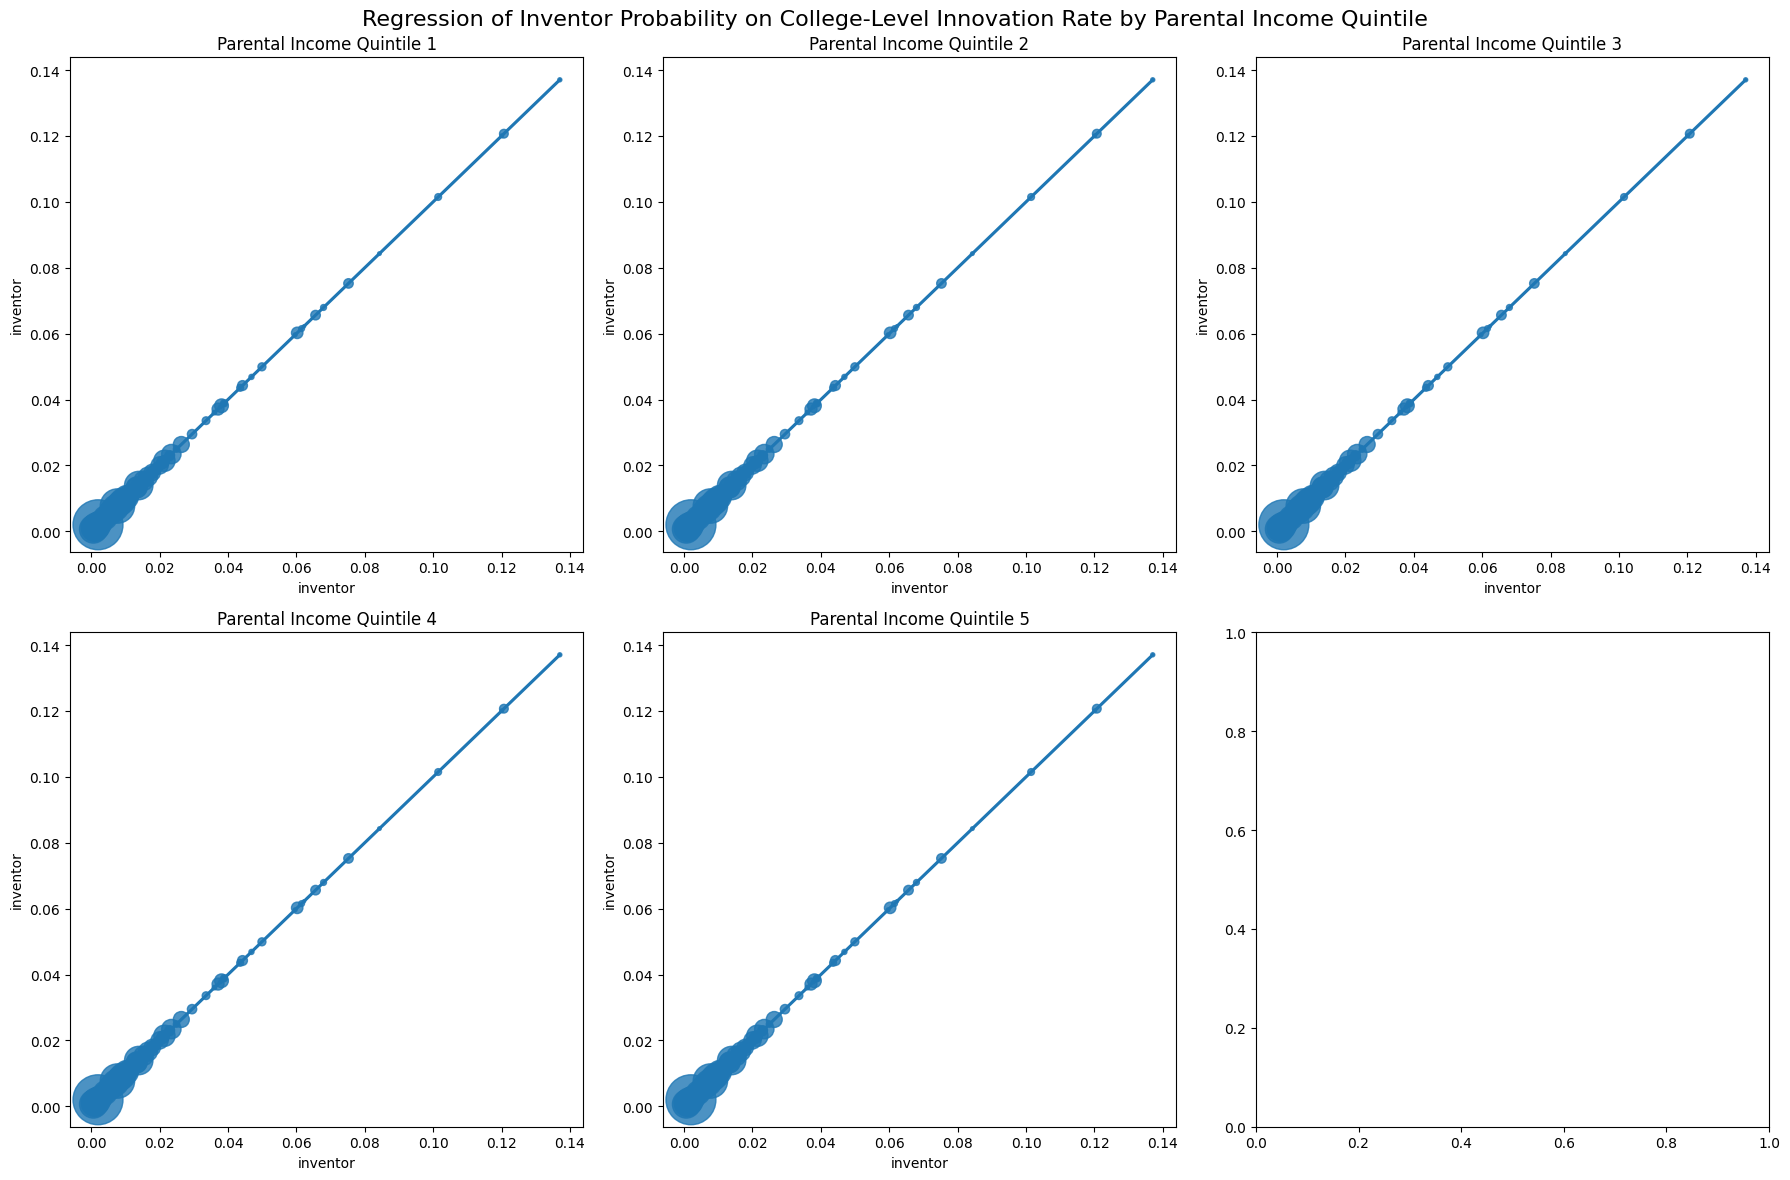

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col

# Load data from Tables 1a, 1b, and 3
data_1a = pd.read_csv('./code_and_data/data/excel/table_1a.csv')
data_1b = pd.read_csv('./code_and_data/data/excel/table_1b.csv')
data_3 = pd.read_csv('./code_and_data/data/excel/table_3.csv')

# Function to run WLS regression and plot results
def run_wls_regression(data, dependent_var, independent_vars, weights, title):
    # Drop rows with missing values
    data = data.dropna(subset=[dependent_var] + independent_vars + [weights])
    
    X = data[independent_vars]
    X = sm.add_constant(X)
    y = data[dependent_var]
    wls_model = sm.WLS(y, X, weights=data[weights])
    results = wls_model.fit()
    
    return results

# Regressions for childhood exposure to innovation (commuting zone level)
cat_results = []
for cat in range(1, 8):
    independent_vars = ['inventor_cat_{}'.format(cat)]
    title = "Regression of Inventor Probability on Childhood Exposure to Innovation\nPatent Category {}".format(cat)
    results = run_wls_regression(data_1a, 'inventor', independent_vars, 'kid_count', title)
    cat_results.append(results)

# Regressions for childhood exposure to innovation by gender (commuting zone level)
gender_results = []
for gender in ['m', 'f']:
    independent_vars = ['inventor_g_{}'.format(gender)]
    title = "Regression of Inventor Probability on Childhood Exposure to Innovation\nGender: {}".format('Male' if gender == 'm' else 'Female')
    results = run_wls_regression(data_1a, 'inventor_g_{}'.format(gender), independent_vars, 'kid_count', title)
    gender_results.append(results)

# Regressions for childhood exposure to innovation by parental income quintile (commuting zone level)
quintile_results = []
for quintile in range(1, 6):
    independent_vars = ['inventor_pq_{}'.format(quintile)]
    title = "Regression of Inventor Probability on Childhood Exposure to Innovation\nParental Income Quintile {}".format(quintile)
    results = run_wls_regression(data_1a, 'inventor_pq_{}'.format(quintile), independent_vars, 'kid_count', title)
    quintile_results.append(results)

# Regressions for college-level innovation rates
college_results = run_wls_regression(data_3, 'inventor', ['inventor'], 'count', "Regression of Inventor Probability on College-Level Innovation Rate")

# Regressions for college-level innovation rates by parental income quintile
college_quintile_results = []
for quintile in range(1, 6):
    independent_vars = ['inventor']
    dependent_var = 'inventor'
    weights = 'count'
    if 'inventor_pq_{}'.format(quintile) in data_3.columns:
        dependent_var = 'inventor_pq_{}'.format(quintile)
    if 'count_pq_{}'.format(quintile) in data_3.columns:
        weights = 'count_pq_{}'.format(quintile)
    title = "Regression of Inventor Probability on College-Level Innovation Rate\nParental Income Quintile {}".format(quintile)
    results = run_wls_regression(data_3, dependent_var, independent_vars, weights, title)
    college_quintile_results.append(results)

# Perform statistical tests on the most relevant coefficients
print("Statistical tests for childhood exposure to innovation by patent category:")
print(summary_col(cat_results, stars=True))

print("\nStatistical tests for childhood exposure to innovation by gender:")
print(summary_col(gender_results, stars=True))

print("\nStatistical tests for childhood exposure to innovation by parental income quintile:")
print(summary_col(quintile_results, stars=True))

print("\nStatistical tests for college-level innovation rates by parental income quintile:")
print(summary_col(college_quintile_results, stars=True))

with open("regression_results.tex", "w") as f:
    f.write("\\documentclass{article}\n")
    f.write("\\usepackage{booktabs}\n")
    f.write("\\begin{document}\n")
    
    f.write("\\section*{Statistical tests for childhood exposure to innovation by patent category}\n")
    f.write(summary_col(cat_results, stars=True).as_latex())
    
    f.write("\\section*{Statistical tests for childhood exposure to innovation by gender}\n")
    f.write(summary_col(gender_results, stars=True).as_latex())
    
    f.write("\\section*{Statistical tests for childhood exposure to innovation by parental income quintile}\n")
    f.write(summary_col(quintile_results, stars=True).as_latex())
    
    f.write("\\section*{Statistical tests for college-level innovation rates by parental income quintile}\n")
    f.write(summary_col(college_quintile_results, stars=True).as_latex())
    
    f.write("\\end{document}")

# Create grids of graphs for each category
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, results in enumerate(cat_results):
    x = results.model.exog[:, 1]
    y = results.model.endog
    weights = results.model.weights
    sns.regplot(x=x, y=y, ax=axs[i//4, i%4], scatter_kws={'s': weights / 100})
    axs[i//4, i%4].set_xlabel('inventor_cat_{}'.format(i+1))
    axs[i//4, i%4].set_ylabel('inventor')
    axs[i//4, i%4].set_title("Patent Category {}".format(i+1))
fig.suptitle("Regression of Inventor Probability on Childhood Exposure to Innovation by Patent Category", fontsize=16)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, results in enumerate(gender_results):
    x = results.model.exog[:, 1]
    y = results.model.endog
    weights = results.model.weights
    sns.regplot(x=x, y=y, ax=axs[i], scatter_kws={'s': weights / 100})
    axs[i].set_xlabel('inventor_g_{}'.format('m' if i == 0 else 'f'))
    axs[i].set_ylabel('inventor_g_{}'.format('m' if i == 0 else 'f'))
    axs[i].set_title("Gender: {}".format('Male' if i == 0 else 'Female'))
fig.suptitle("Regression of Inventor Probability on Childhood Exposure to Innovation by Gender", fontsize=16)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
for i, results in enumerate(quintile_results):
    x = results.model.exog[:, 1]
    y = results.model.endog
    weights = results.model.weights
    sns.regplot(x=x, y=y, ax=axs[i//3, i%3], scatter_kws={'s': weights / 100})
    axs[i//3, i%3].set_xlabel('inventor_pq_{}'.format(i+1))
    axs[i//3, i%3].set_ylabel('inventor_pq_{}'.format(i+1))
    axs[i//3, i%3].set_title("Parental Income Quintile {}".format(i+1))
fig.suptitle("Regression of Inventor Probability on Childhood Exposure to Innovation by Parental Income Quintile", fontsize=16)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
for i, results in enumerate(college_quintile_results):
    x = results.model.exog[:, 1]
    y = results.model.endog
    weights = results.model.weights
    sns.regplot(x=x, y=y, ax=axs[i//3, i%3], scatter_kws={'s': weights / 100})
    axs[i//3, i%3].set_xlabel('inventor')
    axs[i//3, i%3].set_ylabel('inventor')
    axs[i//3, i%3].set_title("Parental Income Quintile {}".format(i+1))
fig.suptitle("Regression of Inventor Probability on College-Level Innovation Rate by Parental Income Quintile", fontsize=16)
plt.tight_layout()
plt.show()